In [151]:
import pandas as pd
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
%matplotlib inline



In [152]:
df = pd.read_csv("arrest.csv")
df.rename(columns={'Unnamed: 0':'States'}, inplace=True)


In [153]:
df = df.set_index('States')


In [154]:
df.head()

,Murder,Assault,UrbanPop,Rape
States,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
Murder      50 non-null float64
Assault     50 non-null int64
UrbanPop    50 non-null int64
Rape        50 non-null float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


# 1.a Using hierarchical clustering with complete linkage and Euclidean distance to cluster the states

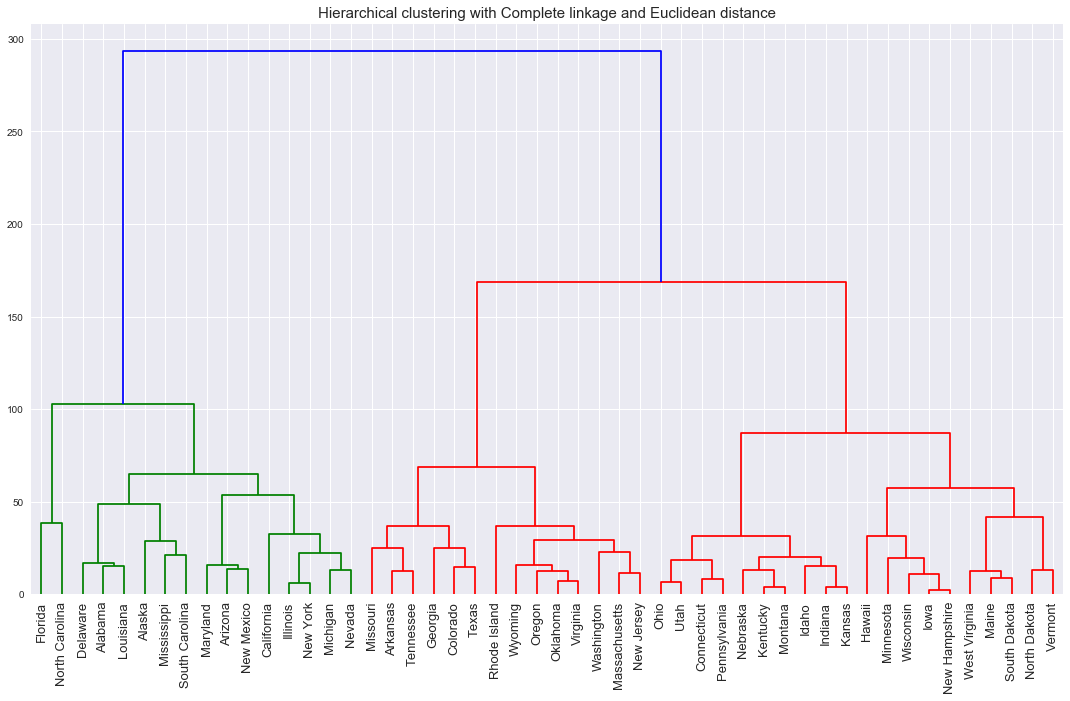

In [156]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)


# Calculate the linkage: mergings
mergings = linkage(df, "complete")

# Plot the dendrogram
dendrogram(mergings, labels=df.index, get_leaves = True,
           leaf_rotation=90,
           leaf_font_size=13,
           show_leaf_counts = True 
)
plt.title('Hierarchical clustering with Complete linkage and Euclidean distance', fontsize=15)
plt.savefig("Hierarchical clustering with Complete linkage and Euclidean distance.png")

plt.show()

# 1.b  Cut the dendrogram at a height that results in three distinct clusters. 

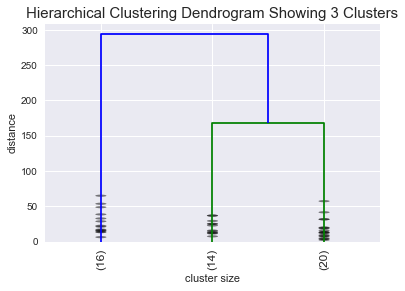

In [157]:

plt.title('Hierarchical Clustering Dendrogram Showing 3 Clusters',fontsize=15)
plt.xlabel('cluster size')
plt.ylabel('distance')
dendrogram(
    mergings,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=3,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()


In [158]:
from scipy.cluster.hierarchy import fcluster
k=3
cluster_3 = fcluster(mergings, k, criterion='maxclust')

# Which states belong to which clusters? 

In [169]:
l = []
for i in range(1,4):
    l.append(df.index.values[cluster_3==i])

cluster = [0,1,2]
df11= pd.DataFrame(l)

df11



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,Alabama,Alaska,Arizona,California,Delaware,Florida,Illinois,Louisiana,Maryland,Michigan,Mississippi,Nevada,New Mexico,New York,North Carolina,South Carolina,None,None,None,None
1,Arkansas,Colorado,Georgia,Massachusetts,Missouri,New Jersey,Oklahoma,Oregon,Rhode Island,Tennessee,Texas,Virginia,Washington,Wyoming,None,None,None,None,None,None
2,Connecticut,Hawaii,Idaho,Indiana,Iowa,Kansas,Kentucky,Maine,Minnesota,Montana,Nebraska,New Hampshire,North Dakota,Ohio,Pennsylvania,South Dakota,Utah,Vermont,West Virginia,Wisconsin


 # 1.c Hierarchically cluster the states using complete linkage and Eu- clidean distance,after scaling the variables to have standard deviation one.


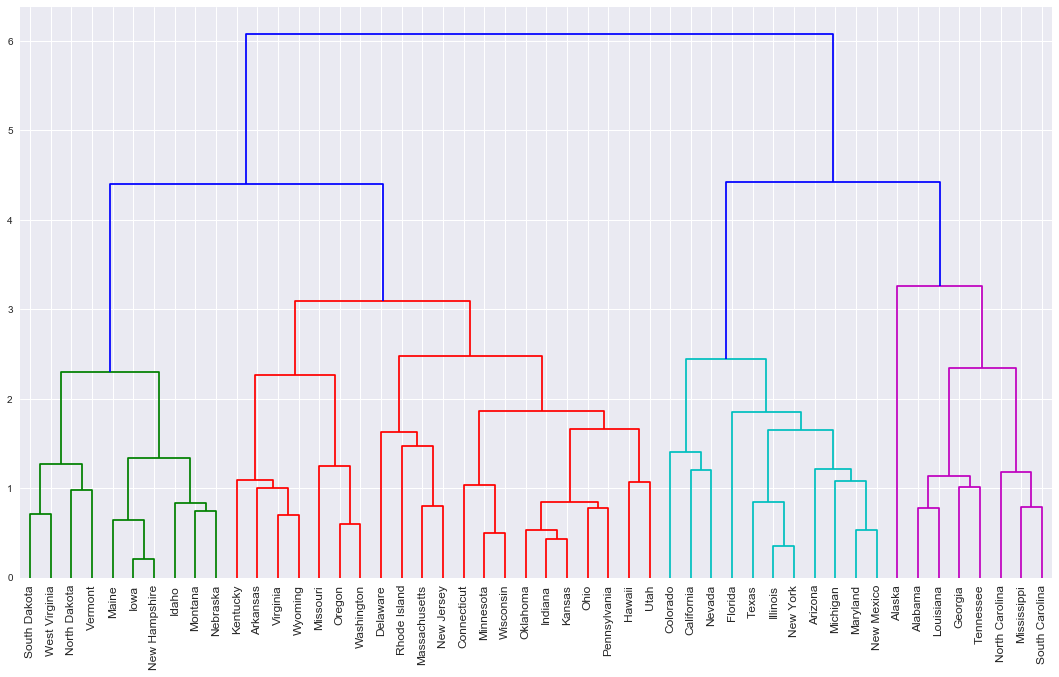

In [160]:
scaled_df=df/df.std()

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

# Calculate the linkage: mergings
mergings = linkage(scaled_df, "complete")

# Plot the dendrogram
dendrogram(mergings, labels=df.index,
           leaf_rotation=90,
           leaf_font_size=12,
)
plt.show()


In [161]:
range_mur = df.Murder.max()-df.Murder.min()
range_ass = df.Assault.max()- df.Assault.min()
range_ur = df.UrbanPop.max()-df.UrbanPop.min()
range_rape = df.Rape.max()-df.Rape.min()
print(range_mur, range_ass,range_rape,range_ur)

16.6 292 38.7 59


In [162]:
df.columns

Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

# 1.d What effect does scaling the variables have on the hierarchical clustering obtained?In your opinion, should the variables be scaled before the inter-observation dissimilarities are computed? Provide a justification for your answer

Feature scaling should be done before computing the interobservation dissimilarities. The features in our dataset have 
span a wide range. Since, hierarchical clustering computes the Euclidean distance features like Assault have a range of 292 whilst Murder has a range of 16.6. Computing the euclidean distance without scaling these features will make the clustering algorithm biased towards the feature with the highest range namely Assault in this dataset. 


# 2.Perform k-means clustering, selecting a suitable range for k. Compare the results with the ones forom question 1.

In [163]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters =3, n_jobs = -1).fit(scaled_df)
x = model.labels_
print(x)

[1 1 1 2 1 1 0 0 1 1 0 2 1 0 2 0 2 1 2 1 0 1 2 1 1 2 2 1 2 0 1 1 1 2 0 0 0
 0 0 1 2 1 1 0 2 0 0 2 2 0]


In [164]:
set(x)

{0, 1, 2}

In [165]:
scaled_df[x==0]

,Murder,Assault,UrbanPop,Rape
States,,,,
Connecticut,0.757661,1.319931,5.319603,1.185089
Delaware,1.354606,2.855852,4.974175,1.686884
Hawaii,1.216850,0.551971,5.734118,2.156649
Indiana,1.653079,1.355930,4.490574,2.242060
Kansas,1.377566,1.379928,4.559660,1.921766
Massachusetts,1.010215,1.787907,5.872289,1.740266
New Jersey,1.698997,1.907901,6.148632,2.007178
Ohio,1.676038,1.439925,5.181432,2.284766
Oklahoma,1.515322,1.811906,4.697832,2.135296


In [166]:
scaled_df[x==1]

,Murder,Assault,UrbanPop,Rape
States,,,,
Alabama,3.030644,2.831853,4.006974,2.263413
Alaska,2.295943,3.155836,3.316116,4.751033
Arizona,1.859713,3.527817,5.526861,3.309708
California,2.066348,3.311828,6.286804,4.334650
Colorado,1.813795,2.447873,5.388689,4.131797
Florida,3.535751,4.019791,5.526861,3.405797
Georgia,3.994940,2.531869,4.145145,2.754531
Illinois,2.387780,2.987845,5.734118,2.562355
Louisiana,3.535751,2.987845,4.559660,2.370178


In [167]:
scaled_df[x==2]

,Murder,Assault,UrbanPop,Rape
States,,,,
Arkansas,2.020429,2.279882,3.454288,2.081913
Idaho,0.596945,1.439925,3.730631,1.516060
Iowa,0.505107,0.671965,3.937888,1.206442
Kentucky,2.227064,1.307932,3.592459,1.740266
Maine,0.482148,0.995948,3.523374,0.832765
Minnesota,0.619904,0.863955,4.559660,1.590795
Montana,1.377566,1.307932,3.661545,1.750942
Nebraska,0.987255,1.223936,4.283317,1.761619
New Hampshire,0.482148,0.683964,3.868802,1.014265


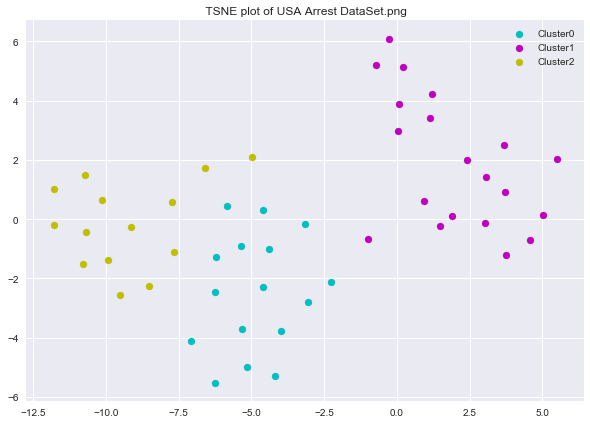

In [170]:
from sklearn.manifold import TSNE

data_embedded = TSNE(n_components=2, n_iter=1000, init='pca', early_exaggeration=4,
                    learning_rate=15, perplexity=15).fit_transform(scaled_df.iloc[:50,:])

rgb = ["c","m","y","b"]

fig = plt.figure()
fig.set_size_inches(10,7)

for i in range(3):
    xs = data_embedded[[x==i][0][:50],0]
    ys = data_embedded[[x==i][0][:50],1]
    plt.scatter(x=xs, y=ys, c = rgb[i],  label ="Cluster{}".format(i))
plt.title(" TSNE plot of USA Arrest DataSet.png")
plt.legend()
plt.show()


fig.savefig("USA Arrest.png")
plt.close(fig)